<h1 align="center"> Project 2 </h1>

---
<h2 align="center"> Image processing </h2>

---
<br>

<b> Group: </b> E2 <br>
<b> Members: </b>
- Franciszek Michal Liszka (frli@itu.dk) <br>
- Gusts Gustavs Grinbergs (gugr@itu.dk) <br>
- Jannik Elsäßer (jels@itu.dk) <br>
- Juraj Septak (juse@itu.dk) <br>
- Mirka Katuscakova (katu@itu.dk) <br>

## Introduction 


Melanoma also known as malignant melanoma ([Schwartzman, 1963](https://jamanetwork.com/journals/jamadermatology/article-abstract/528171)), is the most dangerous type of skin cancer in the world ([Dtwerart, Kleihues & IARC, 2003](https://publications.iarc.fr/Non-Series-Publications/World-Cancer-Reports/World-Cancer-Report-2003)). Melanomas are caused by damaged DNA, which in most cases is the result of exposure to UV light in the sun 3 ([Mayo Clinic, n.d.](https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884)). Each year there are about 133,000 new cases in the entire world, of which the mortality rate highly varies from country to country ([Dtwerart, Kleihues & IARC, 2003](https://publications.iarc.fr/Non-Series-Publications/World-Cancer-Reports/World-Cancer-Report-2003)). In Denmark in 2012 the mortality rate lay around 353.1 (out of 100,000 patients) ([Hoejberg, 2016](https://pubmed.ncbi.nlm.nih.gov/26785326/). In Nordic countries, a steep increase in melanoma incidence has been attributed to excessive sun exposure during vacations in Southern countries ([Dtwerart, Kleihues & IARC, 2003](https://publications.iarc.fr/Non-Series-Publications/World-Cancer-Reports/World-Cancer-Report-2003)).
Melanoma is however highly curable in early stages, before the cancer has spread. Therefore it is extremely important to detect melanoma as soon as possible.

We have designed an algorithm, that extracts features from an image of a persons skin, and automatically detects probability of it being a melanoma spot. With this algorithm, we hope to be able to automatically detect melanoma in its early stages. This could prevent many thousands of deaths every year. It will also relieve dermatologists, by giving patients another possibility of finding out if they have cancer.



### Required Libraries
Numerous built-in and external Python libraries are used in this notebook. Thus, the notebook can run correctly only with all imported libraries installed.

In addition, the notebook should be made `Trusted`. This will ensure both that the code blocks run correctly and display the correct output

If needed you can read more documentation about the different libraries that are imported
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Numpy Documentation](https://numpy.org/doc/)
* [Matplotlib Documentation](http://matplotlib.org/)
* [OpenCV](https://opencv.org)



#### Folder Structure

This is the expected folder structure. In order for this notebook to run correctly this folder structure must be used.

```
fyp2022p02_E2/
├─ Notebooks/
│  ├─ fyp2022p02_E2_Notebook.ipynb (current location)
├─ Data/
.....to be written
├─ gitlog.txt
```

In [1]:
import matplotlib.pyplot as plt                    # used for plotting and visualizing data
import matplotlib.ticker as ticker                 # used for hiding ticks on axes of plots
import numpy as np                                 # used for numerical calculations and fast array manipulations
import pandas as pd                                # used for providing major datastructure pd.DataFrame() to store the datasets
import math                                        # used for getting the exact value of pi number
from skimpy import skim                            # used for creating summary statistics from dataframes
from PIL import Image                              # used for loading images from files
import cv2                                         # used for providing important computer vision functions
import pickle                                      # used for saving and loading trained classifiers
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report #measuring performance
from sklearn import tree
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#not used yet in this notebook (check later):
from skimage import morphology, transform
import os
import sys

----

## Task 0: Exploring the data

#### Brief Description of our data:

In [2]:
path = 'data/example_ground_truth.csv'
img_metadata = pd.read_csv(path)
features_path = 'data/features.csv'
features = pd.read_csv(features_path)

In [3]:
print("melanoma Present:", len(img_metadata[img_metadata["melanoma"] == 1]))
print("melanoma Not-Present:", len(img_metadata[img_metadata["melanoma"] == 0]))
print("seborrheic_keratosis Present:",len(img_metadata[img_metadata["seborrheic_keratosis"] == 1]),)
print(
    "seborrheic_keratosis Not-Present:",
    len(img_metadata[img_metadata["seborrheic_keratosis"] == 0]),
)
print(
    "number of images that contain both types of cancer:",
    len(img_metadata[          (img_metadata["melanoma"] == 1)
            & (img_metadata["seborrheic_keratosis"] == 1)
        ]
    ),
)


melanoma Present: 30
melanoma Not-Present: 120
seborrheic_keratosis Present: 42
seborrheic_keratosis Not-Present: 108
number of images that contain both types of cancer: 0


In [4]:
bool_cols = img_metadata[['melanoma','seborrheic_keratosis']].astype('bool')
img_metadata[['melanoma','seborrheic_keratosis']] = bool_cols
skim(img_metadata)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 150    │ │ bool        │ 2     │                                    │
│ │ Number of columns │ 3      │ │ object      │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                           bool                                            │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃                                       ┃ true      ┃ true rate          ┃ hist        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ melanoma                              │        30 │                0.2 │   █    ▂    │  │
│ │ seborrheic_keratosis                  │        42 │               0.28 │   █    ▃    │  │
│ └───────────────────────────────────────┴───────────┴────────────────────┴─────────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

----

## Task 1: Measure the features manually

In [5]:
data = pd.read_csv("/work/data/manual_classification.csv", skiprows=1)
data.head()

,Unnamed: 0,Asymetry,Color,Border,Variety of colors,Asymetry.1,Color.1,Border.1,Variety of colors.1,Asymetry.2,...,Border.2,Variety of colors.2,Asymetry.3,Color.3,Border.3,Variety of colors.3,Asymetry.4,Color.4,Border.4,Variety of colors.4
0,ISIC_0001769.jpg,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,ISIC_0001852.jpg,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
2,ISIC_0001871.jpg,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
3,ISIC_0003462.jpg,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ISIC_0003539.jpg,2.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0


In [6]:
asymetrydata = [data["Asymetry"], data["Asymetry.1"], data["Asymetry.2"], data["Asymetry.3"], data["Asymetry.4"]]
colordata = [data["Color"], data["Color.1"], data["Color.2"], data["Color.3"], data["Color.4"]]
borderdata = [data["Border"], data["Border.1"], data["Border.2"], data["Border.3"], data["Border.4"]]
colorvardata = [data["Variety of colors"], data["Variety of colors.1"], data["Variety of colors.2"], data["Variety of colors.3"], data["Variety of colors.4"]]

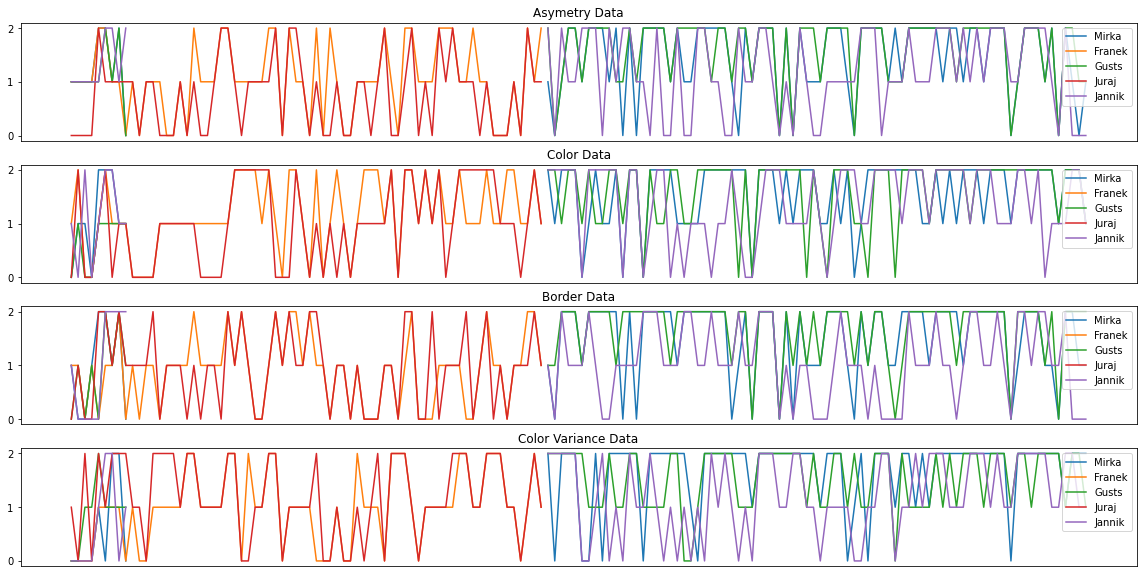

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
y_axes = data['Unnamed: 0']

for i in asymetrydata:
    ax[0].title.set_text("Asymetry Data")
    ax[0].plot(y_axes, i)
for i in colordata:
    ax[1].title.set_text("Color Data")
    ax[1].plot(y_axes, i)
for i in borderdata:
    ax[2].title.set_text("Border Data")
    ax[2].plot(y_axes, i)
for i in colorvardata:
    ax[3].title.set_text("Color Variance Data")
    ax[3].plot(y_axes, i)
for t in range(0, 4):    
    ax[t].yaxis.set_ticks([0,1,2])
    ax[t].xaxis.set_major_locator(ticker.NullLocator())
    ax[t].legend(["Mirka", "Franek", "Gusts", "Juraj", "Jannik"], loc="upper right")

Text(0.5, 0.98, 'How Mirka, Gusts and Jannik Agree in All Features [Percentage | Total Labels]')

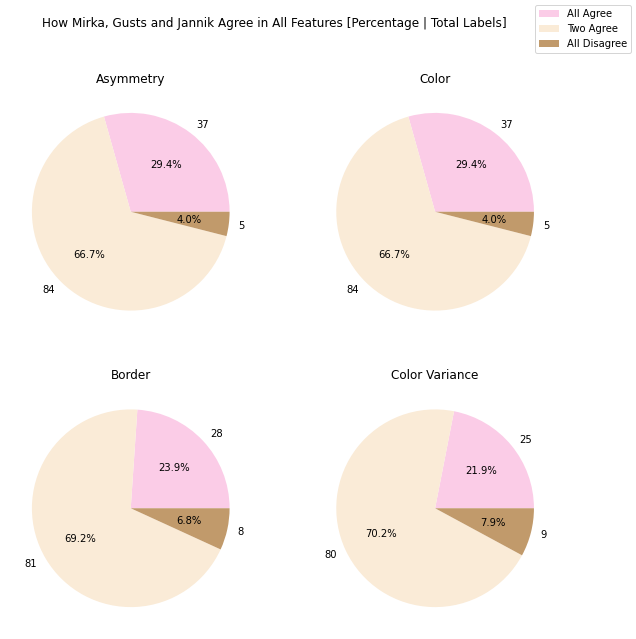

In [8]:
agrees_list = [0] * 12
disagrees = 0
variables = ["Asymetry", "Color", "Border", "Variety of colors"]

offset = 1
for t in variables:
    for i, j, k in zip(data[t].dropna(), data[t+".2"].dropna(), data[t+".4"].dropna()):
        if i == j and j == k: 
            agrees_list[offset-1] += 1
        if (i == j) or (j == k) or (i == k):
            agrees_list[offset] += 1
        else:
            agrees_list[offset+1] += 1
    offset += 3

fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].pie(agrees_list[0:3],colors=['#fbcce7','#faebd7','#c19a6b'],labels =agrees_list[0:3],autopct='%1.1f%%')
ax[0,0].title.set_text("Asymmetry")
ax[0,1].pie(agrees_list[3:6],colors=['#fbcce7','#faebd7','#c19a6b'],labels =agrees_list[3:6],autopct='%1.1f%%')
ax[0,1].title.set_text("Color")
ax[1,0].pie(agrees_list[6:9],colors=['#fbcce7','#faebd7','#c19a6b'],labels =agrees_list[6:9],autopct='%1.1f%%')
ax[1,0].title.set_text("Border")
ax[1,1].pie(agrees_list[9:12],colors=['#fbcce7','#faebd7','#c19a6b'],labels =agrees_list[9:12],autopct='%1.1f%%')
ax[1,1].title.set_text("Color Variance")
fig.legend(["All Agree", "Two Agree", "All Disagree"], fontsize=10)
fig.suptitle("How Mirka, Gusts and Jannik Agree in All Features [Percentage | Total Labels]")

#plt.savefig('agreement.png', bbox_inches='tight')

Text(0.5, 0.98, 'How Franek and Juraj agree in all features [Percentage | Total Labels]')

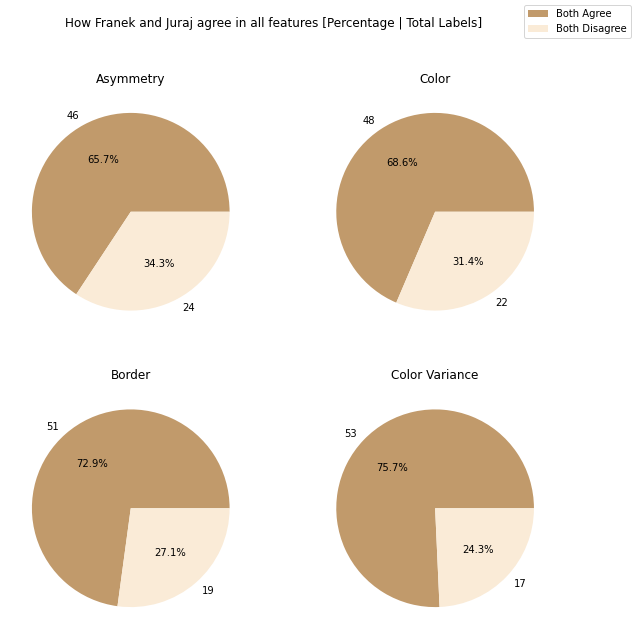

In [9]:
agrees_list2 = [0] * 8
disagrees = 0
variables = ["Asymetry", "Color", "Border", "Variety of colors"]

offset = 1
for t in variables:
    for i, j in zip(data[t+".1"].dropna(), data[t+".3"].dropna()):
        if i == j:
            agrees_list2[offset-1] += 1
        else:
            agrees_list2[offset] += 1
    offset += 2
agrees_list2

fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].pie(agrees_list2[0:2],colors=['#c19a6b','#faebd7'], labels=agrees_list2[0:2],autopct='%1.1f%%')
ax[0,0].title.set_text("Asymmetry")
ax[0,1].pie(agrees_list2[2:4],colors=['#c19a6b','#faebd7'],labels=agrees_list2[2:4],autopct='%1.1f%%')
ax[0,1].title.set_text("Color")
ax[1,0].pie(agrees_list2[4:6], colors=['#c19a6b','#faebd7'],labels=agrees_list2[4:6],autopct='%1.1f%%')
ax[1,0].title.set_text("Border")
ax[1,1].pie(agrees_list2[6:8],colors=['#c19a6b','#faebd7'],labels=agrees_list2[6:8],autopct='%1.1f%%')
ax[1,1].title.set_text("Color Variance")
fig.legend(["Both Agree", "Both Disagree"], fontsize=10)
fig.suptitle("How Franek and Juraj agree in all features [Percentage | Total Labels]")

#plt.savefig('agreement.png', bbox_inches='tight')

----

## Task 2: Measure the features

In [10]:
def load_image(image_file, mask_file):
    """
    loads image and converts to correct datatype
    """
    test_mask = np.array(Image.open(mask_file))
    ima = np.array(Image.open(image_file))
    return test_mask, ima

In [11]:
def masking(ima, test_mask):
    """
    masking and cropping input image with binary mask
    """

    result = cv2.bitwise_and(ima,ima,mask=test_mask) #putting the mask on the image

    #cropping
    setm=set()
    setn=set()
    for x, i in enumerate(test_mask[:]):
        if 255 in i:
            setm.add(x)
    for i in range(test_mask.shape[1]):
        if 255 in test_mask[:,i]:
            setn.add(i)
    im2 = result[min(setm):max(setm),min(setn):max(setn),:]
    #im2=im2.crop(im2.getbbox())
    
    return im2

#### A: Asymmetry

In [12]:
def extract_asymmetry(im):
    """
    extracts the lesion's asymmetry score
    """
    im = Image.fromarray(im).crop(Image.fromarray(im).getbbox())
    mid = binary_search_mid(im)
    im = np.array(im)
    left = im[:, :mid]
    right = im[:, mid:]
    #pad smaller array with 0 to properly compare
    wdiff = left.shape[1] - right.shape[1]
    if wdiff <= 0:
        left = np.pad(left,[(0,0),(abs(wdiff),0)],mode='constant')
    else:
        right = np.pad(right,[(0,0),(0,abs(wdiff))], mode='constant')
    left = np.flip(left,1)
    # print(np.sum(left), np.sum(right))
    return (np.sum((left != right) & ((left != 0) | (right != 0)))/np.sum(im))*100

def binary_search_mid(im):
    #helper function for extract_asymmetry()
    
    im = np.array(im.crop(im.getbbox()))
    low = 0
    high = int(im.shape[1])- 1
    mid = 0
    while low <= high:
        mid = (high + low) // 2
        lower_half = np.sum(im[:,:mid])
        upper_half = np.sum(im[:,mid:])
        # If x is greater, ignore left half
        if  lower_half < upper_half :
            low = mid + 1 
        # If x is smaller, ignore right half
        elif lower_half > upper_half:
            high = mid - 1 
        # means x is present at mid
        else:
            return mid
    return mid

#### B: Border

In [13]:
def extract_roundness(test_mask):
    """
    extracts the lesion's roundness score
    """
    th = 120
    # threshold the gray
    th, threshed = cv2.threshold(test_mask, th, 255, cv2.THRESH_BINARY)

    cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
    keep_area = 0
    keep_arcelng = 0
    #We iterate over contours since there could be many in the image, but we are interested in the biggest one - the lesion
    for cnt in cnts:
        arclen_lib = cv2.arcLength(cnt, True)
        area_lib = cv2.contourArea(cnt)
        if area_lib > keep_area:
            keep_area = area_lib
        if arclen_lib > keep_arcelng:
            keep_arcelng = arclen_lib
    compactness = (round(4*math.pi*keep_area, 4))/(round(keep_arcelng**2, 4))
    return compactness


#### C: Color

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3184884/

Color Mask Steps:
- Use the lesion mask on the image
- Calculate average RGB values

Color Detection with OpenCV: https://techvidvan.com/tutorials/detect-objects-of-similar-color-using-opencv-in-python/

Image colorfulness according to https://pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/

$rg = R - G$

$yb = \frac{1}{2}(R + G) - B$

$\sigma_{rgyb} = \sqrt{\sigma_{rg}^2 + \sigma_{yb}^2}$

$\mu_{rgyb} = \sqrt{\mu_{rg}^2 + \mu_{yb}^2}$

$C = \sigma_{rgyb} + 0.3 * \mu_{rgyb}$

In [14]:
def colors(im2):
    """
    extracts average color, dominant color, and color variance
    """
    im4=im2
    #Extract the background (black) region
    mask1=im2[:,:,0]==0
    mask2=im2[:,:,1]==0
    mask3=im2[:,:,2]==0
    finalmask=mask1 | mask2 | mask3
    im2=(im2[~finalmask])
    im3=np.reshape(im2,(-1,3))

    #calculating average
    average = np.average(im3, axis=0)
    pixels = np.float32(im3.reshape(-1, 3))

    #Next we apply k-means clustering to create a palette with the most representative colours of the image
    n_colors = 5

    #we need to specify the criteria. Our criteria is such that, whenever 200 iterations of algorithm is ran, or an accuracy of epsilon = .1 is reached, stop the algorithm and return the answer.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)

    #finally the dominant colour is the palette colour which occurs most frequently on the image
    dominant = palette[np.argmax(counts)]

    #variability
    b, g, r = cv2.split(im4.astype("float"))
    rg = np.absolute(r - g)
    yb = np.absolute(0.5 * (r + g) - b)

    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))

    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    variability= stdRoot + (0.3 * meanRoot)

    av_r, av_g, av_b = np.array_split(average, 3)

    av_r, av_g, av_b = float(av_r/255), float(av_g/255), float(av_b/255)

    dom_r, dom_g, dom_b = np.array_split(dominant, 3)
    dom_r, dom_g, dom_b = float(dom_r/255), float(dom_g/255), float(dom_b/255)
    # hex_average = '%02x%02x%02x' % (int(av_r), int(av_g), int(av_b))
    # hex_dominant = '%02x%02x%02x' % (int(dom_r), int(dom_g), int(dom_b))
    
    return av_r, av_g, av_b, dom_r, dom_g, dom_b, variability/109

### Extracting features

In [15]:
def extract_features(image_file, mask_file):
    mask, image = load_image(image_file, mask_file)
    masked_image = masking(image, mask)

    avg_r, avg_g, avg_b, dom_r, dom_g, dom_b, var_col = colors(masked_image)
    asymmetry = extract_asymmetry(mask)
    roundness = extract_roundness(mask)

    return avg_r, avg_g, avg_b, dom_r, dom_g, dom_b, round(var_col, 2), round(asymmetry, 4), roundness

#### Results

Text(0.5, 1.0, 'Most Round')

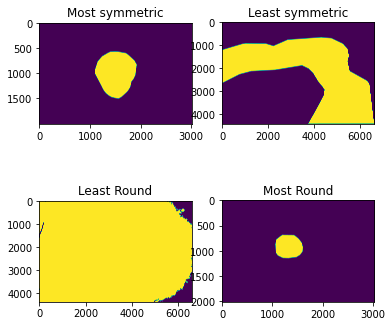

In [16]:
data = pd.read_csv('data/results.csv')
data

#most asymmetric
ma = Image.open("data/example_segmentation/" + list(data[data['Asym']==data['Asym'].max()]["File"])[0][:-4] + '_segmentation.png')

#least asymmetric
la = Image.open("data/example_segmentation/" + list(data[data['Asym']==data['Asym'].min()]["File"])[0][:-4] + '_segmentation.png')

#least round
lr = Image.open("data/example_segmentation/" + list(data[data['Rndns']==data['Rndns'].min()]["File"])[0][:-4] + '_segmentation.png')

#most round 
mr = Image.open("data/example_segmentation/" + list(data[data['Rndns']==data['Rndns'].max()]["File"])[0][:-4] + '_segmentation.png')


fig, ax = plt.subplots(2, 2, figsize=(6, 6), constrained_layout = False)

ax[0,0].imshow(la)
ax[0,0].set_title("Most symmetric")
ax[0,1].imshow(ma) 
ax[0,1].set_title("Least symmetric")
ax[1,0].imshow(lr)
ax[1,0].set_title("Least Round")
ax[1,1].imshow(mr)
ax[1,1].set_title("Most Round")


#### Manual vs. Automatic Feature Extraction Results

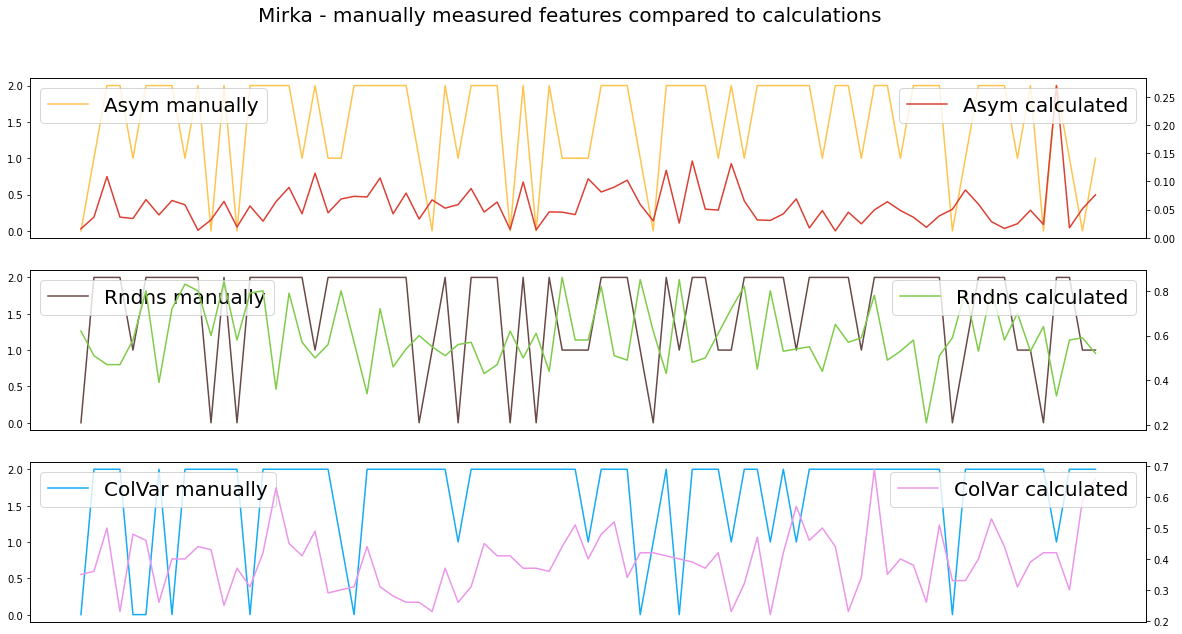

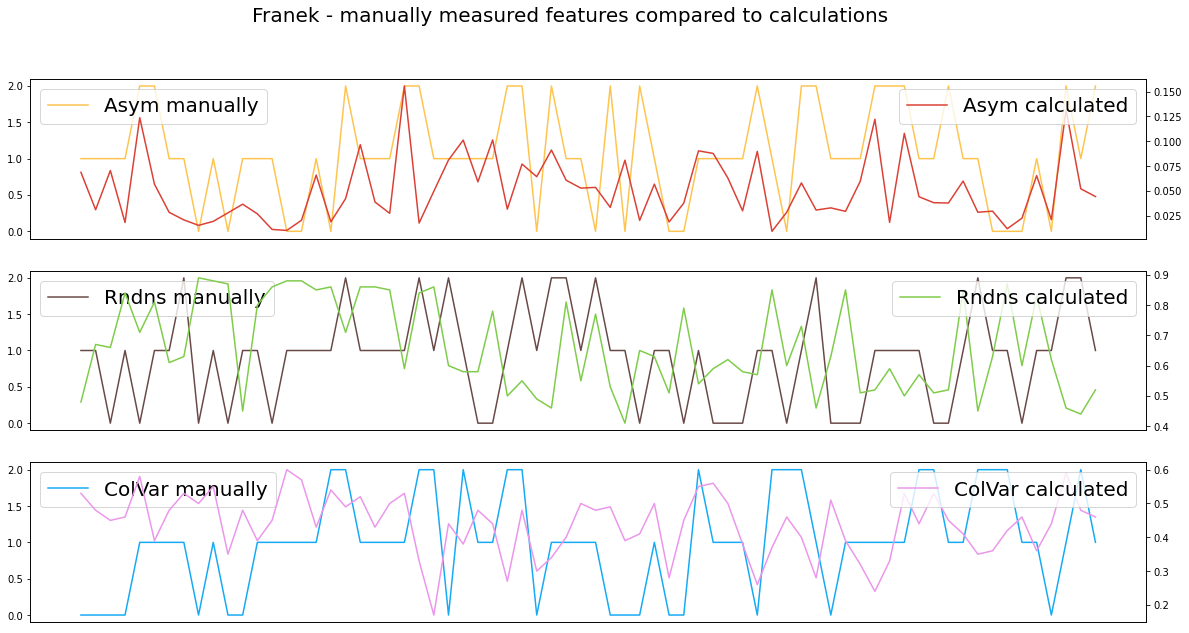

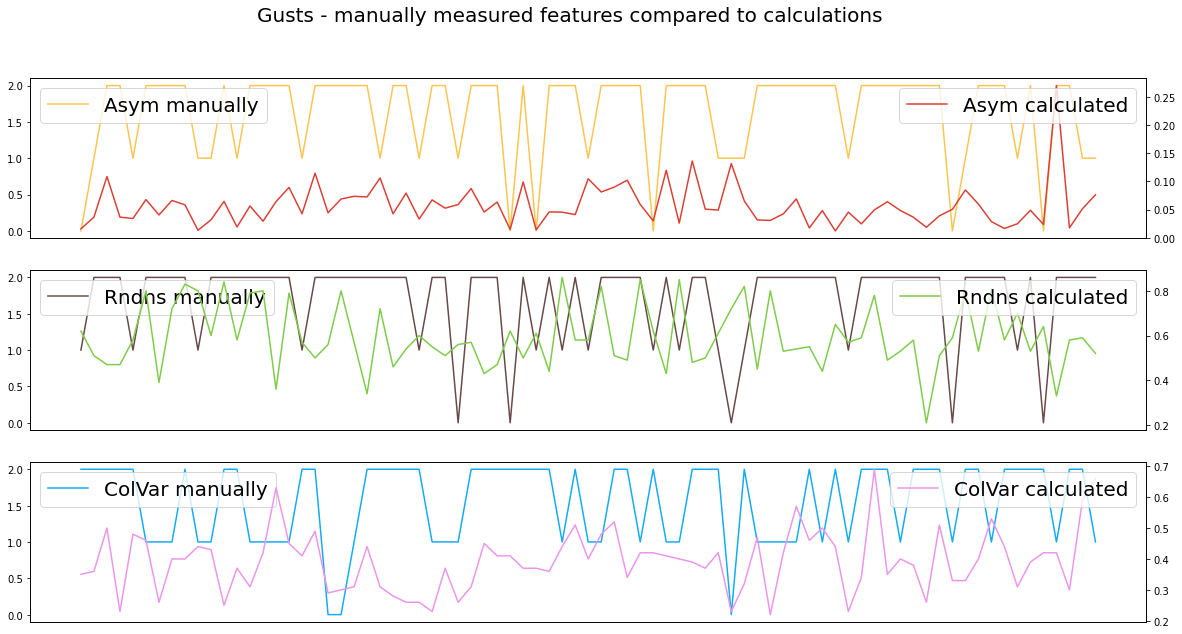

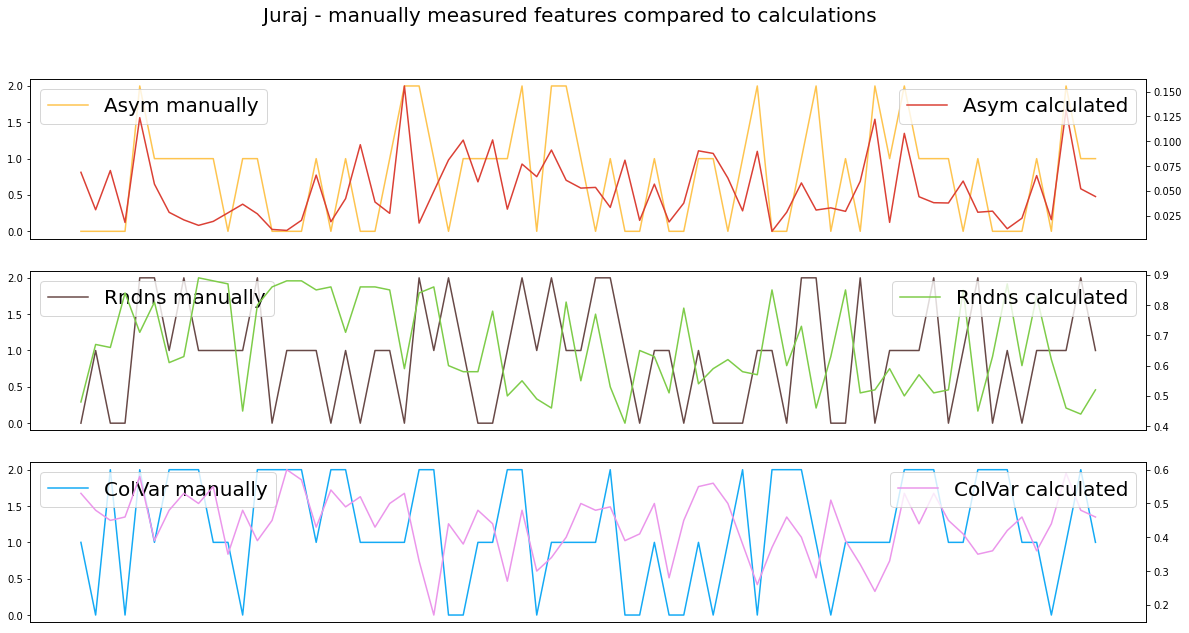

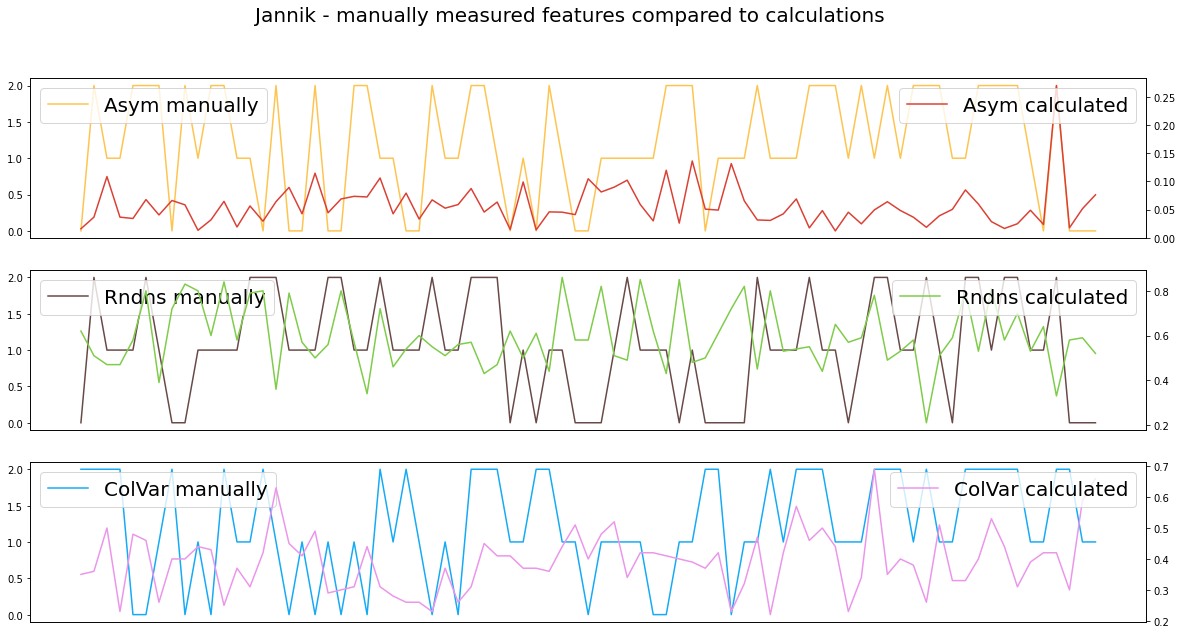

In [17]:
feature_df = pd.read_csv('/work/data/results.csv')
# fig, axes = plt.subplots(nrows=15, figsize=(20, 50))
# y_axes =data['Unnamed: 0']
people = ["Mirka", "Franek", "Gusts", "Juraj", "Jannik"]
people1=["Mirka", "Gusts", "Jannik"]
people2= ["Franek", "Juraj"]

for i, person in enumerate(people):
    if person in people1:
        numb1,numb2=71,151
    else:
        numb1,numb2=0,70
    fig, axes = plt.subplots(nrows=3, figsize=(20, 10))
    fig.suptitle(person+' - manually measured features compared to calculations',fontsize=20)
    axes[0].plot(y_axes[numb1:numb2],asymetrydata[i][numb1:numb2],'#fec44f',label='Asymmetry')
    ax2=axes[0].twinx()
    ax2.xaxis.set_major_locator(ticker.NullLocator())
    ax2.plot(y_axes[numb1:numb2],feature_df['Asym'][numb1:numb2],'#DB4035')
    ax2.legend(['Asym calculated'], loc="upper right", fontsize=20)
    axes[0].legend(['Asym manually'], loc="upper left", fontsize=20)

    axes[1].plot(y_axes[numb1:numb2],borderdata[i][numb1:numb2],'#684947',label='Border')
    ax2=axes[1].twinx()
    ax2.xaxis.set_major_locator(ticker.NullLocator())
    ax2.plot(y_axes[numb1:numb2],feature_df['Rndns'][numb1:numb2],'#7ECC49')
    ax2.legend(['Rndns calculated'],loc="upper right", fontsize=20)
    axes[1].legend(['Rndns manually'], loc="upper left", fontsize=20)
    
    axes[2].plot(y_axes[numb1:numb2],colorvardata[i][numb1:numb2],'#14AAF5',label='Color_Var')
    ax2=axes[2].twinx()
    ax2.xaxis.set_major_locator(ticker.NullLocator())
    ax2.plot(y_axes[numb1:numb2],feature_df['ColVar'][numb1:numb2],'#EB96EB')
    ax2.legend(['ColVar calculated'],loc="upper right", fontsize=20)
    axes[2].legend(['ColVar manually'], loc="upper left", fontsize=20)
    #print(data['Unnamed: 0'].shape)

    #plt.savefig('comparison' + person +'.png', bbox_inches='tight')
    



## Task 3: Predict the diagnosis

In [18]:
#split the data -> training, validation
#use the training to train different classifiers
#eval the performance
#analyze the results (fx knn on many different k's)
#create a function that takes an image, measures the features, classifies the image and outputs its probability of being malnoma 

In [19]:
melanoma = pd.read_csv("/work/results/ISIC-results-melanoma.csv")
melanoma['melanoma'] = 1

not_melanoma = pd.read_csv("/work/results/ISIC-results-notmelanoma.csv")
not_melanoma['melanoma'] = 0

melanoma_rndns = pd.read_csv("/work/results/melanoma-corrected-rndns.csv")
not_melanoma_rndns = pd.read_csv("/work/results/not-melanoma-corrected-rndns.csv")

columns = ["ImageID", "Melanoma", "Avg_r", "Avg_g",  "Avg_b", "Dom_r", "Dom_g", "Dom_b", "Col_var", "Asymm", "Rndns"]

merged_rndns = pd.concat([melanoma_rndns, not_melanoma_rndns])
merged_df = pd.concat([melanoma, not_melanoma])

merged_rndns = merged_rndns.rename(columns={'Rndns': 'File', 'File': 'Rndns'})

df = merged_df[["File", "melanoma", "Avg_r", "Avg_g", "Avg_b", "Dom_r", "Dom_g","Dom_b", "ColVar", "Asym", "Rndns"]]

df = merged_df.drop(['Rndns'], 1)
df = df.merge(merged_rndns, how='left', on='File')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [20]:
X = df[["Avg_r", "Avg_g", "Avg_b", "Dom_r", "Dom_g","Dom_b", "ColVar", "Asym", "Rndns"]]
y = df['melanoma']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1400, 9) (1400,)
(600, 9) (600,)


<AxesSubplot:>

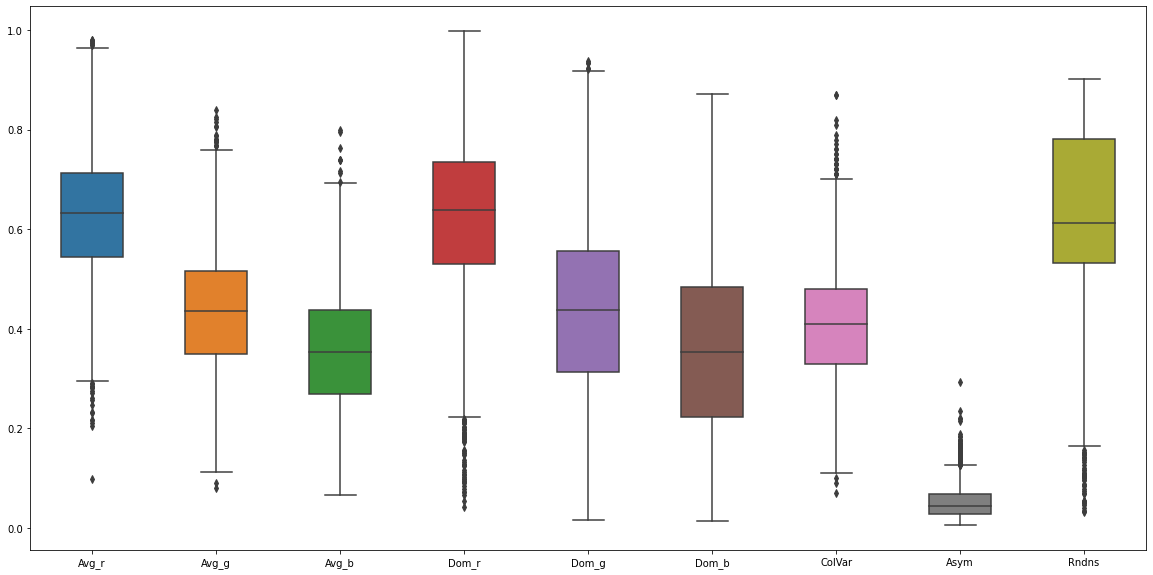

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data = X, width =0.5)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([0.815, 0.7975, 0.805, 0.8075, 0.805],
 [0.5169230769230769,
  0.49589743589743596,
  0.49538461538461537,
  0.4969230769230769,
  0.5005128205128205])

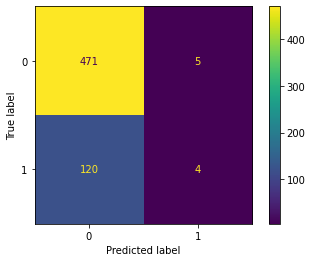

In [23]:
def knn_classifier(X_train, X_Test, y_train, y_test, X, y, k, confusion_matrix = None):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(X_train, y_train)

    scores = []
    roc_list = []

    for train_index, test_index in sss.split(X, y):
                X_train_s, X_test_s = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train_s, y_test_s= y.iloc[train_index], y.iloc[test_index]
                knn_classifier.fit(X_train_s, y_train_s)
                pred = knn_classifier.predict(X_test_s)
                scores.append(accuracy_score(y_test_s, pred))
                roc_list.append(roc_auc_score(y_test_s, pred))
    if confusion_matrix == True:
        plot_confusion_matrix(knn_classifier, X_test, y_test)
    return scores, roc_list

knn_classifier(X_train, X_test, y_train, y_test, X, y, 13, True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([0.7125, 0.7175, 0.685, 0.75, 0.72],
 [0.541025641025641,
  0.5287179487179486,
  0.5394871794871795,
  0.558974358974359,
  0.4994871794871795])

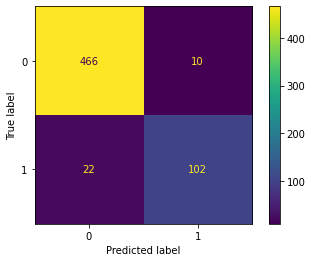

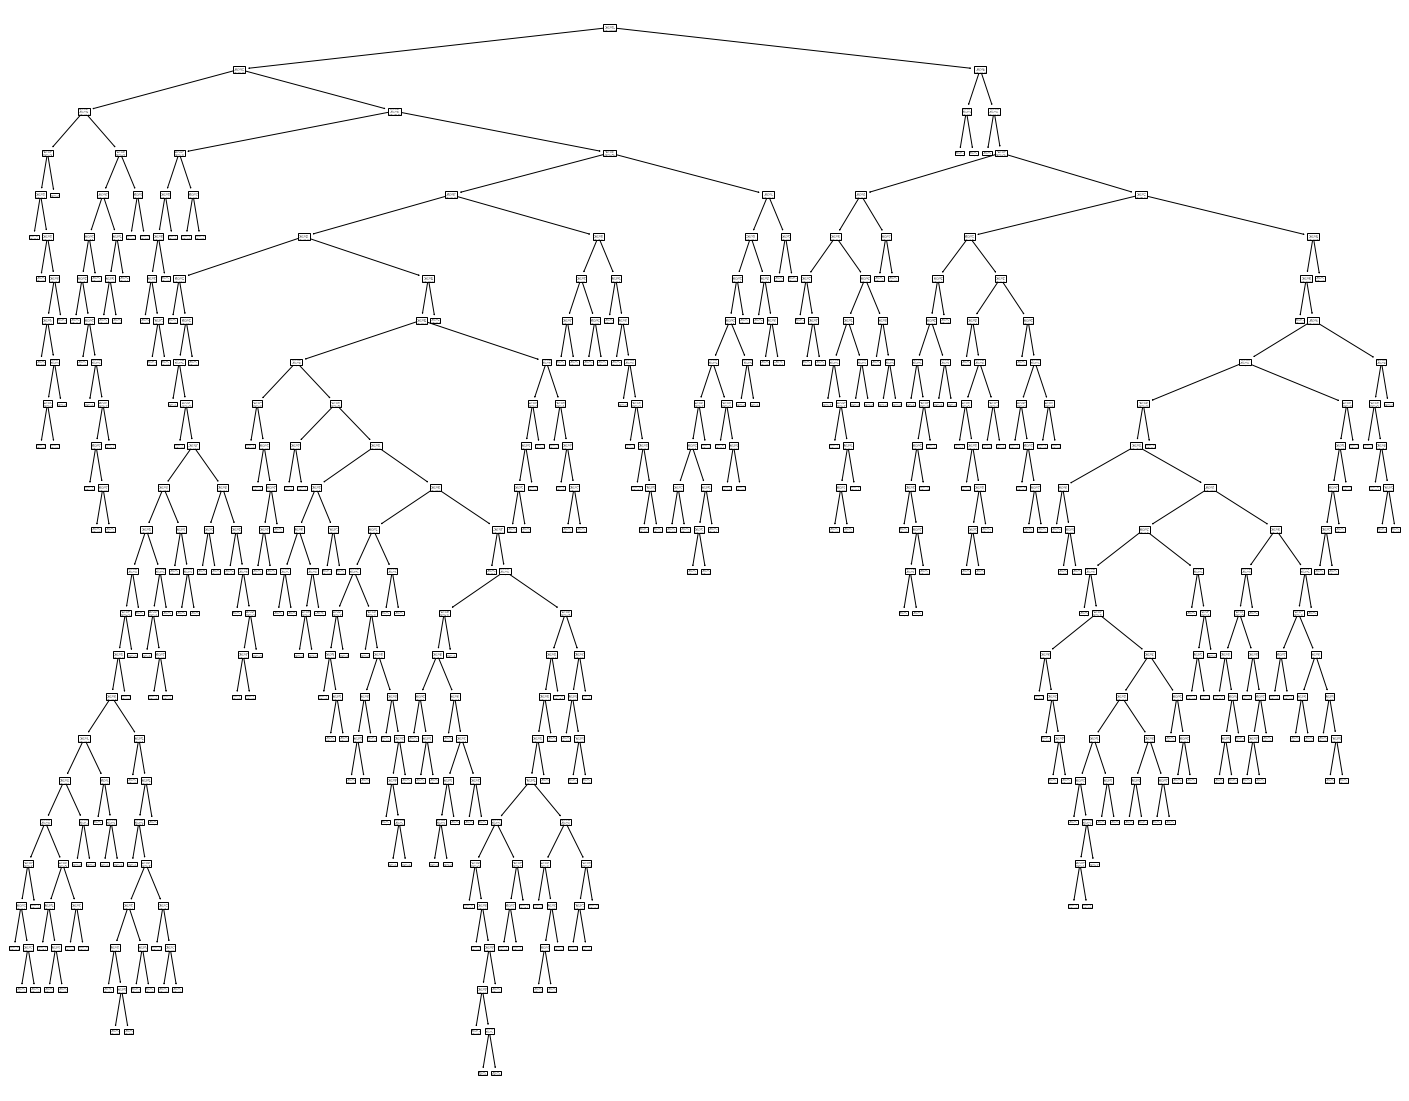

In [24]:
def decision_tree_classifier(X_train, X_Test, y_train, y_test,X, y, confusion_matrix = None, tree_viz = None):
 
    dec_tree_classifier = DecisionTreeClassifier()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(X_train, y_train)

    scores = []
    roc_list = []

    for train_index, test_index in sss.split(X, y):
                X_train_s, X_test_s = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train_s, y_test_s= y.iloc[train_index], y.iloc[test_index]
                dec_tree_classifier.fit(X_train_s, y_train_s)
                pred = dec_tree_classifier.predict(X_test_s)
                scores.append(accuracy_score(y_test_s, pred))
                roc_list.append(roc_auc_score(y_test_s, pred))
    if confusion_matrix == True:
        plot_confusion_matrix(dec_tree_classifier, X_test, y_test)
    if tree_viz == True:
        text_representation = tree.export_text(dec_tree_classifier)
        fig = plt.figure(figsize=(25,20))
        _ = tree.plot_tree(dec_tree_classifier)
    return scores, roc_list

decision_tree_classifier(X_train, X_test, y_train, y_test, X, y, True, True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([0.8125, 0.805, 0.8125, 0.8125, 0.81],
 [0.5102564102564102,
  0.5107692307692309,
  0.5102564102564102,
  0.5205128205128204,
  0.5087179487179486])

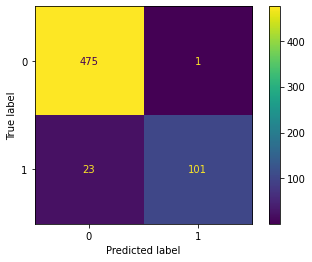

In [25]:
def random_forest_classifier(X_train, X_Test, y_train, y_test,X,y, confusion_matrix = None):
 
    rand_forest_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state = 0)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(X_train, y_train)

    scores = []
    roc_list = []

    for train_index, test_index in sss.split(X, y):
                X_train_s, X_test_s = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train_s, y_test_s= y.iloc[train_index], y.iloc[test_index]
                rand_forest_classifier.fit(X_train_s, y_train_s)
                pred = rand_forest_classifier.predict(X_test_s)
                scores.append(accuracy_score(y_test_s, pred))
                roc_list.append(roc_auc_score(y_test_s, pred))
    if confusion_matrix == True:
        plot_confusion_matrix(rand_forest_classifier, X_test, y_test)
    return scores, roc_list

random_forest_classifier(X_train, X_test, y_train, y_test, X, y, True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([0.8125, 0.8125, 0.8125, 0.8125, 0.8125], [0.5, 0.5, 0.5, 0.5, 0.5])

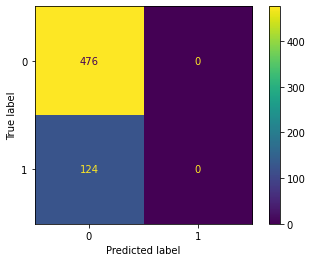

In [26]:
def logistic_regression(X_train, X_Test, y_train, y_test,X,y, confusion_matrix = None):
 
    logistic_regression_classifier = LogisticRegression()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(X_train, y_train)

    scores = []
    roc_list = []

    for train_index, test_index in sss.split(X, y):
                X_train_s, X_test_s = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train_s, y_test_s= y.iloc[train_index], y.iloc[test_index]
                logistic_regression_classifier.fit(X_train_s, y_train_s)
                pred = logistic_regression_classifier.predict(X_test_s)
                scores.append(accuracy_score(y_test_s, pred))
                roc_list.append(roc_auc_score(y_test_s, pred))
    if confusion_matrix == True:
        plot_confusion_matrix(logistic_regression_classifier, X_test, y_test)
    return scores, roc_list

logistic_regression(X_train, X_test, y_train, y_test, X, y, True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([0.8125, 0.8125, 0.8125, 0.8125, 0.8125], [0.5, 0.5, 0.5, 0.5, 0.5])

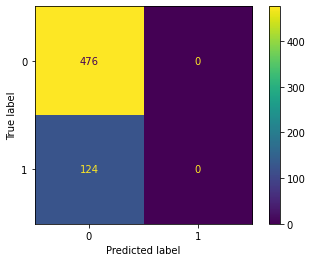

In [27]:
def support_vector_machine(X_train, X_Test, y_train, y_test,X,y, confusion_matrix = None):
 
    svm_classifier = SVC()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(X_train, y_train)

    scores = []
    roc_list = []

    for train_index, test_index in sss.split(X, y):
                X_train_s, X_test_s = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train_s, y_test_s= y.iloc[train_index], y.iloc[test_index]
                svm_classifier.fit(X_train_s, y_train_s)
                pred = svm_classifier.predict(X_test_s)
                scores.append(accuracy_score(y_test_s, pred))
                roc_list.append(roc_auc_score(y_test_s, pred))
    if confusion_matrix == True:
        plot_confusion_matrix(svm_classifier, X_test, y_test)
    return scores, roc_list

support_vector_machine(X_train, X_test, y_train, y_test, X, y, True)

In [28]:
#proof that roc is valid 
#repeat for a split 50-50
#Cutting the dataframe so that there is an equal amount of melanoma and non melanoma

lst = list(df[df['melanoma'] == 0].index)[:1252]
even_split = df.copy()
even_split = even_split.drop(lst)

len(even_split[even_split['melanoma'] == 1]) == len(even_split[even_split['melanoma'] == 0])

True

In [29]:
X_even = even_split[["Avg_r", "Avg_g", "Avg_b", "Dom_r", "Dom_g","Dom_b", "ColVar", "Asym", "Rndns"]]
y_even = even_split['melanoma']  

X_train_even, X_test_even, y_train_even, y_test_even = train_test_split(X_even, y_even, test_size=0.3)

print(X_train_even.shape, y_train_even.shape)
print(X_test_even.shape, y_test_even.shape)


(523, 9) (523,)
(225, 9) (225,)


In [30]:
print("Evenly split dataframe (50-50 melanoma-not melanoma)")
print("KNN:",knn_classifier(X_train_even, X_test_even, y_train_even, y_test_even, X_even, y_even, 13))
print("Decision tree:",decision_tree_classifier(X_train_even, X_test_even, y_train_even, y_test_even, X_even, y_even))
print("Random forest:",random_forest_classifier(X_train_even, X_test_even, y_train_even, y_test_even, X_even, y_even))
print("Logistic regression:", logistic_regression(X_train_even, X_test_even, y_train_even, y_test_even, X_even, y_even))
print("Support vector machine", support_vector_machine(X_train_even, X_test_even, y_train_even, y_test_even, X_even, y_even))


Evenly split dataframe (50-50 melanoma-not melanoma)
KNN: ([0.5933333333333334, 0.5666666666666667, 0.66, 0.64, 0.5866666666666667], [0.5933333333333334, 0.5666666666666667, 0.66, 0.64, 0.5866666666666667])
Decision tree: ([0.52, 0.5666666666666667, 0.5466666666666666, 0.62, 0.6133333333333333], [0.52, 0.5666666666666668, 0.5466666666666666, 0.62, 0.6133333333333333])
Random forest: ([0.6133333333333333, 0.64, 0.62, 0.7066666666666667, 0.6866666666666666], [0.6133333333333333, 0.64, 0.62, 0.7066666666666666, 0.6866666666666666])
Logistic regression: ([0.56, 0.5066666666666667, 0.6466666666666666, 0.6, 0.6066666666666667], [0.5599999999999999, 0.5066666666666666, 0.6466666666666667, 0.6, 0.6066666666666667])
Support vector machine ([0.6133333333333333, 0.5533333333333333, 0.6666666666666666, 0.6066666666666667, 0.6066666666666667], [0.6133333333333333, 0.5533333333333333, 0.6666666666666667, 0.6066666666666667, 0.6066666666666667])


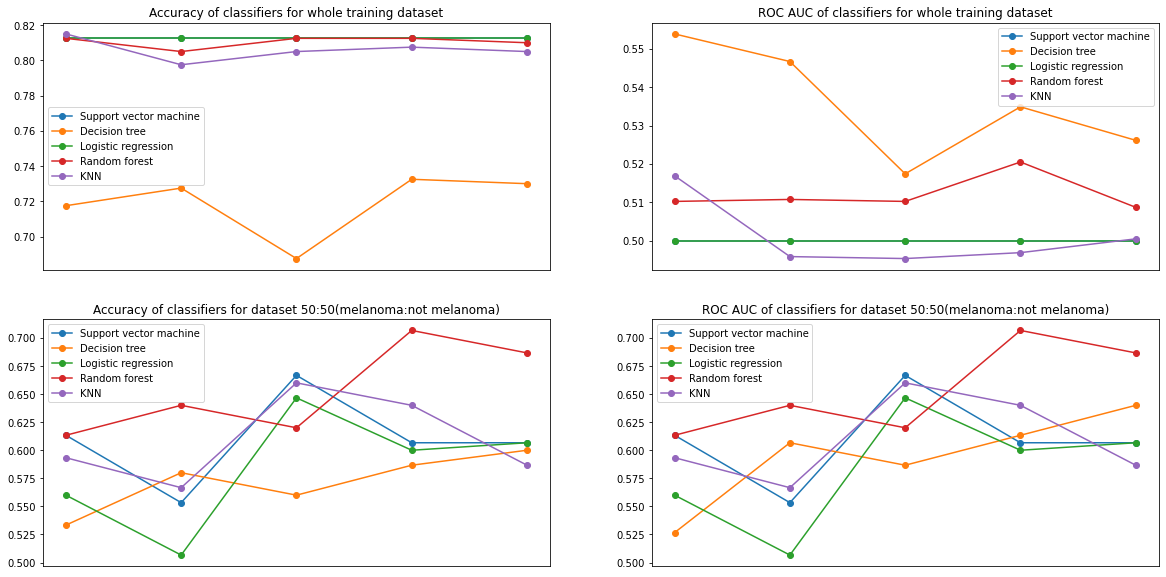

In [31]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
x=[1,2,3,4,5]
titles=['Accuracy of classifiers','ROC AUC of classifiers']
for i in range(2):
    axes[0][i].plot(x,support_vector_machine(X_train, X_test, y_train, y_test,X,y)[i],label='Support vector machine',marker='o')
    axes[0][i].plot(x,decision_tree_classifier(X_train, X_test, y_train, y_test,X,y)[i],label='Decision tree',marker='o')
    axes[0][i].plot(x,logistic_regression(X_train, X_test, y_train, y_test,X,y)[i],label='Logistic regression',marker='o')
    axes[0][i].plot(x,random_forest_classifier(X_train, X_test, y_train, y_test,X,y)[i],label='Random forest',marker='o')
    axes[0][i].plot(x,knn_classifier(X_train, X_test, y_train, y_test,X,y, 13)[i],label='KNN',marker='o')
    axes[0][i].xaxis.set_major_locator(ticker.NullLocator())
    axes[0][i].legend()
    axes[0][i].set_title(titles[i]+' for whole training dataset')
    
    axes[1][i].plot(x,support_vector_machine(X_train_even, X_test_even, y_train_even, y_test_even,X_even,y_even)[i],label='Support vector machine',marker='o')
    axes[1][i].plot(x,decision_tree_classifier(X_train_even, X_test_even, y_train_even, y_test_even,X_even,y_even)[i],label='Decision tree',marker='o')
    axes[1][i].plot(x,logistic_regression(X_train_even, X_test_even, y_train_even, y_test_even,X_even,y_even)[i],label='Logistic regression',marker='o')
    axes[1][i].plot(x,random_forest_classifier(X_train_even, X_test_even, y_train_even, y_test_even,X_even,y_even)[i],label='Random forest',marker='o')
    axes[1][i].plot(x,knn_classifier(X_train_even, X_test_even, y_train_even, y_test_even,X_even,y_even, 13)[i],label='KNN',marker='o')
    axes[1][i].xaxis.set_major_locator(ticker.NullLocator())
    axes[1][i].legend()
    axes[1][i].set_title(titles[i]+' for dataset 50:50(melanoma:not melanoma)')


In [32]:
def classification_model(x, y):
    classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state = 0)
    classifier.fit(x, y)
    filename = "/work/pickle/groupE2.sav"
    pickle.dump(classifier, open(filename, 'wb'))

classification_model(X_train, y_train)
    

In [33]:
def classify(img_path, mask_path):
    """
    extract_features output: avg_r, avg_g, avg_b, dom_r, dom_g, dom_b, var_col, asymmetry, roundness
    """
    # extract_features(img_path, mask_path)
    df = pd.DataFrame(list(extract_features(img_path, mask_path))).T
    df.columns = ["Avg_r", "Avg_g", "Avg_b", "Dom_r", "Dom_g","Dom_b", "ColVar", "Asym", "Rndns"]
    classifier = pickle.load(open('/work/pickle/groupE2.sav', 'rb'))
    pred = classifier.predict_proba(df)
    return pred

In [34]:
classify("/work/data/example_image/ISIC_0012151.jpg", "/work/data/example_segmentation/ISIC_0012151_segmentation.png")

array([[0.81, 0.19]])

In [35]:
classifier = pickle.load(open('/work/pickle/groupE2.sav', 'rb'))
pred = classifier.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, pred))

Accuracy score:  0.7883333333333333


## Task 4: Discussion

In [36]:
meta_data = pd.read_csv("/work/data/ISIC-2017_Training_Data_metadata.csv")
meta_data['File'] = (meta_data['image_id']+".jpg")
meta_df = meta_data.drop(['image_id'], axis = 1)
meta_df = df.merge(meta_df, how = 'right', on='File')

sex = {'male': 1, "female": 0, 'unknown': None}
# meta_df['sex'] = [sex[item] for item in data['sex']]
meta_df.drop(meta_df[meta_df['sex'] == "unknown"].index, inplace = True)
meta_df.drop(meta_df[meta_df['age_approximate'] == "unknown"].index, inplace = True)

meta_df['sex'] = (meta_df['sex'] == 'male').astype(int)
meta_df['age_approximate'] = pd.to_numeric(meta_df['age_approximate'])
meta_df["age_approximate"] = meta_df["age_approximate"]/100

meta_df.head()

,Avg_r,Avg_g,Avg_b,Dom_r,Dom_g,Dom_b,ColVar,Asym,File,melanoma,Rndns,age_approximate,sex
0,0.339566,0.308152,0.329342,0.188655,0.160658,0.178984,0.10,0.0605,ISIC_0000000.jpg,0,0.683202,0.55,0
1,0.307536,0.207567,0.163641,0.244695,0.151671,0.122338,0.24,0.0237,ISIC_0000001.jpg,0,0.582620,0.30,0
2,0.508465,0.422987,0.435785,0.509484,0.406626,0.403742,0.20,0.0619,ISIC_0000002.jpg,1,0.506758,0.60,0
3,0.528001,0.374706,0.274614,0.463563,0.291676,0.193197,0.39,0.0338,ISIC_0000003.jpg,0,0.682134,0.30,1
4,0.735144,0.500108,0.604018,0.821270,0.483802,0.591958,0.47,0.0501,ISIC_0000004.jpg,1,0.831833,0.80,1


In [37]:
X_meta = meta_df[["Avg_r", "Avg_g", "Avg_b", "Dom_r", "Dom_g","Dom_b", "ColVar", "Asym", "Rndns", "age_approximate", "sex"]]
y_meta = meta_df['melanoma']  

X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.3)

In [38]:
print("Models performance after adding 2 new parameters - sex, age")
print("\nKNN:",knn_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta, 13))
print("\nDecision tree:",decision_tree_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta))
print("\nRandom forest:",random_forest_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta))
print("\nLogistic regression:", logistic_regression(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta))
print("\nSupport vector machine", support_vector_machine(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta))

Models performance after adding 2 new parameters - sex, age

KNN: ([0.8080229226361032, 0.8080229226361032, 0.7965616045845272, 0.8137535816618912, 0.8166189111747851], [0.5165786220074182, 0.503933910306845, 0.5096099808924356, 0.5137405867146229, 0.5218051028436551])

Decision tree: ([0.7421203438395415, 0.7535816618911175, 0.7478510028653295, 0.7363896848137536, 0.7277936962750716], [0.5839889850511408, 0.5719905586152635, 0.5811509497583455, 0.5741823086433628, 0.5246993368551197])

Random forest: ([0.8223495702005731, 0.836676217765043, 0.8223495702005731, 0.8223495702005731, 0.8137535816618912], [0.5189670675508598, 0.5592896481960211, 0.5442564909520062, 0.5442564909520062, 0.545352365966056])

Logistic regression: ([0.8223495702005731, 0.8223495702005731, 0.8223495702005731, 0.8223495702005731, 0.8223495702005731], [0.5, 0.5, 0.5063223558502866, 0.5, 0.5])

Support vector machine ([0.8223495702005731, 0.8223495702005731, 0.8223495702005731, 0.8223495702005731, 0.822349570200573

In [39]:
def classification_model_meta(x, y):
    """
    2nd train model - with sex and age
    """
    classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state = 0)
    classifier.fit(x, y)
    filename = "/work/pickle/groupE2_meta.sav"
    pickle.dump(classifier, open(filename, 'wb'))

classification_model_meta(X_train_meta, y_train_meta)

In [40]:
classifier_meta = pickle.load(open('/work/pickle/groupE2_meta.sav', 'rb'))
pred_meta = classifier_meta.predict(X_test_meta)
print("Accuracy score: ", accuracy_score(y_test_meta, pred_meta))

Accuracy score:  0.8416030534351145


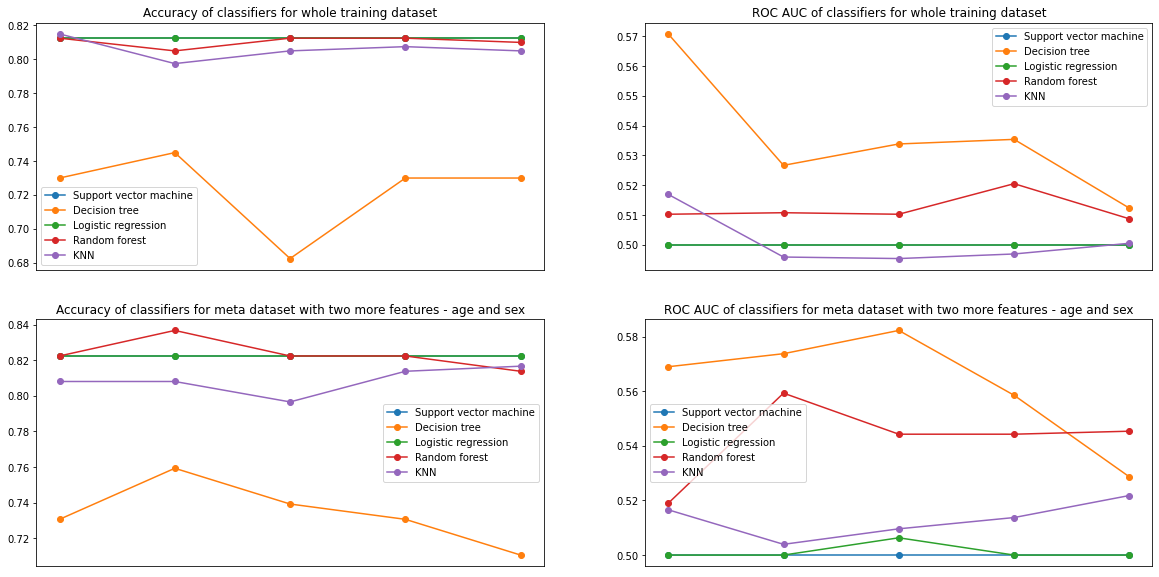

In [41]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
x=[1,2,3,4,5]
titles=['Accuracy of classifiers','ROC AUC of classifiers']
for i in range(2):
    axes[0][i].plot(x,support_vector_machine(X_train, X_test, y_train, y_test,X,y)[i],label='Support vector machine',marker='o')
    axes[0][i].plot(x,decision_tree_classifier(X_train, X_test, y_train, y_test,X,y)[i],label='Decision tree',marker='o')
    axes[0][i].plot(x,logistic_regression(X_train, X_test, y_train, y_test,X,y)[i],label='Logistic regression',marker='o')
    axes[0][i].plot(x,random_forest_classifier(X_train, X_test, y_train, y_test,X,y)[i],label='Random forest',marker='o')
    axes[0][i].plot(x,knn_classifier(X_train, X_test, y_train, y_test,X,y, 13)[i],label='KNN',marker='o')
    axes[0][i].xaxis.set_major_locator(ticker.NullLocator())
    axes[0][i].legend()
    axes[0][i].set_title(titles[i]+' for whole training dataset')
    
    axes[1][i].plot(x,support_vector_machine(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta)[i],label='Support vector machine',marker='o')
    axes[1][i].plot(x,decision_tree_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta)[i],label='Decision tree',marker='o')
    axes[1][i].plot(x,logistic_regression(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta)[i],label='Logistic regression',marker='o')
    axes[1][i].plot(x,random_forest_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta)[i],label='Random forest',marker='o')
    axes[1][i].plot(x,knn_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta, 13)[i],label='KNN',marker='o')
    axes[1][i].xaxis.set_major_locator(ticker.NullLocator())
    axes[1][i].legend()
    axes[1][i].set_title(titles[i]+' for meta dataset with two more features - age and sex')

Text(0.5, 1.0, 'Random forest accuracy')

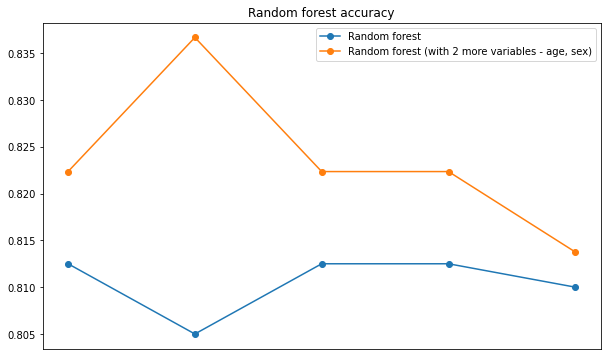

In [42]:
plt.figure(figsize=(10,6)) 
plt.plot(x,random_forest_classifier(X_train, X_test, y_train, y_test,X,y)[0],label='Random forest',marker='o')
plt.plot(x,random_forest_classifier(X_train_meta, X_test_meta, y_train_meta, y_test_meta, X_meta, y_meta)[0],label='Random forest (with 2 more variables - age, sex)',marker='o')
plt.legend()
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.title("Random forest accuracy")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2864c6e2-f7d5-4aa2-a469-a311a3a701c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>